# Attention seq2seq in PyTorch

The `18_attention_seq2seq` notebook explores the use of attention mechanisms in sequence-to-sequence (seq2seq) models, enhancing the model's ability to focus on relevant parts of the input sequence during translation. 

The notebook guides through preparing the dataset, building the Encoder model, implementing the attention mechanism, and integrating it into the Decoder model. It then covers training the attention-based seq2seq model, evaluating its performance, visualizing attention weights, and experimenting with hyperparameters for better results.

## Table of contents

1. [Understanding Attention in seq2seq Models](#understanding-attention-in-seq2seq-models)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Building the Encoder model](#building-the-encoder-model)
5. [Building the Attention mechanism](#building-the-attention-mechanism)
6. [Building the Decoder model with Attention](#building-the-decoder-model-with-attention)
7. [Combining Encoder and Decoder into an Attention seq2seq model](#combining-encoder-and-decoder-into-an-attention-seq2seq-model)
8. [Training the Attention seq2seq model](#training-the-attention-seq2seq-model)
9. [Evaluating the Attention seq2seq model](#evaluating-the-attention-seq2seq-model)
10. [Visualizing Attention weights](#visualizing-attention-weights)
11. [Experimenting with hyperparameters](#experimenting-with-hyperparameters)

## Understanding Attention in seq2seq Models

Attention-based sequence-to-sequence (seq2seq) models are an extension of the traditional seq2seq architecture designed to address the limitations of encoding long input sequences into a fixed-length context vector. The primary innovation in these models is the **attention mechanism**, which allows the model to focus on specific parts of the input sequence at each step of the output generation. This significantly improves the model's ability to handle longer sequences and complex relationships between input and output elements.

Attention mechanisms have become particularly important in tasks such as **machine translation**, **text summarization**, and **image captioning**, where the relationship between input and output tokens is not always direct or linear.

### **Key challenges with traditional seq2seq models**

In the traditional seq2seq architecture, the encoder processes the entire input sequence and produces a fixed-length context vector that summarizes the information. The decoder then generates the output sequence based solely on this vector. While this approach works well for short sequences, it faces several problems with longer sequences:
- **Information bottleneck**: Compressing all the information from the input sequence into a single context vector often leads to information loss, especially for long and complex inputs.
- **Difficulty in long-term dependencies**: The fixed-length context vector struggles to capture long-term dependencies between distant elements in the sequence.

### **How attention works in seq2seq models**

The attention mechanism resolves these issues by allowing the decoder to focus on different parts of the input sequence dynamically, rather than relying on a single context vector. At each decoding step, the attention mechanism computes a set of attention weights, which determine how much focus should be given to each input token. This gives the model the flexibility to concentrate on the most relevant parts of the input sequence for generating the next output token.

In essence, the decoder no longer uses a single, fixed-length context vector. Instead, it generates a new context vector at each time step, which is a weighted sum of the encoder’s hidden states. These weights are learned dynamically based on how relevant each input token is to the current output token being generated.

### **Components of the attention mechanism**

#### **Alignment scores**
The first step in the attention mechanism is to compute **alignment scores** between the current decoder hidden state and each of the encoder’s hidden states. These scores indicate how well the current output token is aligned with each input token. The alignment scores can be computed in different ways, such as:
- **Dot product**: Taking the dot product between the decoder’s hidden state and each encoder hidden state.
- **Additive (Bahdanau) attention**: A more complex approach that uses a learned feedforward network to compute the alignment scores.
- **Scaled dot product (Luong) attention**: A scaled version of the dot product attention to prevent very large values when working with high-dimensional hidden states.

#### **Attention weights**
Once the alignment scores are computed, they are normalized using a softmax function to produce **attention weights**. These weights represent the importance of each input token relative to the current decoding step. Higher attention weights indicate that the decoder should focus more on the corresponding input token.

The attention weights sum to 1 and are used to compute a weighted average of the encoder’s hidden states.

#### **Context vector**
The context vector at each decoding step is a weighted sum of the encoder’s hidden states, where the weights are the attention scores. This context vector contains information about the most relevant parts of the input sequence for generating the current output token. The context vector is updated at every decoding step, providing the decoder with more focused and relevant information compared to using a single context vector for the entire sequence.

The decoder combines this context vector with its own hidden state to generate the next output token.

### **Training attention-based seq2seq models**

Attention-based seq2seq models are trained in a manner similar to traditional seq2seq models, with the key difference being the introduction of the attention mechanism. The training process minimizes a loss function, such as cross-entropy, to match the predicted output sequence with the target sequence.

During training, **teacher forcing** is commonly used, where the true output token from the previous time step is provided to the decoder as input. The model learns to generate accurate translations or outputs by adjusting the attention weights and improving the alignment between the input and output sequences.

### **Benefits of attention mechanisms in seq2seq models**

The attention mechanism provides several important benefits:
- **Improved handling of long sequences**: By allowing the decoder to focus on different parts of the input sequence at each time step, attention mechanisms eliminate the information bottleneck, making it easier for the model to handle long sequences.
- **Better alignment**: In tasks like machine translation, attention mechanisms help the model align words or phrases in the input and output sequences more effectively, capturing the relationships between corresponding tokens across languages.
- **Interpretability**: The attention weights provide a form of interpretability, as they show which parts of the input sequence the model is focusing on while generating each output token. This can be useful for understanding how the model works and debugging its predictions.

### **Applications of attention-based seq2seq models**

Attention-based seq2seq models are widely used in tasks where the input and output are sequences and where the alignment between these sequences is important. Some common applications include:
- **Machine translation**: In machine translation tasks, attention mechanisms help the model align words in the source language with their translations in the target language, improving the quality of translations, especially for long or complex sentences.
- **Text summarization**: Attention mechanisms are used to focus on the most important parts of a document when generating a summary, making the output more concise and relevant.
- **Speech recognition**: Attention-based models help align audio signals with their corresponding transcriptions, improving the performance of automatic speech recognition systems.
- **Image captioning**: In tasks where images are translated into descriptive sentences, attention mechanisms can help the model focus on specific parts of the image while generating each word of the caption.

### **Limitations of attention-based seq2seq models**

Despite their success, attention-based seq2seq models have some limitations:
- **Computation cost**: The attention mechanism introduces additional computational overhead, as it requires calculating alignment scores and attention weights for each input token at every decoding step.
- **Long training times**: Due to the added complexity, attention-based models can take longer to train compared to vanilla seq2seq models, especially on large datasets.

### **Maths**

#### **Encoder**

In the attention-based seq2seq model, the encoder processes the input sequence $ X = (x_1, x_2, \dots, x_T) $, where $ T $ is the length of the input sequence. Each input token $ x_t $ is passed through a recurrent neural network (RNN), such as an LSTM or GRU, to produce a sequence of hidden states $ h_t $:

$$
h_t = f(W_{hx} x_t + W_{hh} h_{t-1} + b_h)
$$

where:
- $ h_t $ is the hidden state at time step $ t $,
- $ W_{hx} $ is the weight matrix for the input $ x_t $,
- $ W_{hh} $ is the weight matrix for the hidden state $ h_{t-1} $,
- $ b_h $ is the bias,
- $ f $ is the non-linear activation function (e.g., tanh or ReLU).

The encoder generates hidden states for every input token, resulting in $ H = (h_1, h_2, \dots, h_T) $, a sequence of hidden states that will be used in the attention mechanism.

#### **Decoder**

The decoder in the attention-based seq2seq model takes the context vector (a dynamic combination of encoder hidden states) and the previous decoder hidden state to generate the output sequence. The decoder’s hidden state $ s_t $ at each time step is computed using the previous output token $ y_{t-1} $, the context vector $ c_t $, and the previous hidden state $ s_{t-1} $:

$$
s_t = f(W_{sy} y_{t-1} + W_{sc} c_t + W_{ss} s_{t-1} + b_s)
$$

where:
- $ s_t $ is the hidden state of the decoder at time step $ t $,
- $ y_{t-1} $ is the previous output token,
- $ c_t $ is the context vector at time step $ t $,
- $ W_{sy}, W_{sc}, W_{ss} $ are the weight matrices for the previous output token, the context vector, and the previous hidden state, respectively,
- $ b_s $ is the bias term.

The output at each time step is generated using the hidden state $ s_t $, typically passed through a softmax function to generate probabilities over the target vocabulary.

#### **Attention mechanism**

The core of the attention mechanism lies in generating the context vector $ c_t $ at each decoding step. Instead of using a single fixed-length context vector (as in traditional seq2seq models), the attention mechanism dynamically computes a weighted sum of all encoder hidden states $ h_1, h_2, \dots, h_T $ at each time step of the decoder.

##### **Step 1: Alignment scores**

The attention mechanism computes an **alignment score** $ e_{t,i} $ between the current decoder hidden state $ s_t $ and each encoder hidden state $ h_i $. The alignment score represents the relevance of encoder hidden state $ h_i $ to the current decoding step $ t $. The alignment score can be computed in various ways, such as:

- **Dot-product**: The dot product between $ s_t $ and $ h_i $:

  $$
  e_{t,i} = s_t^T h_i
  $$

- **Additive attention (Bahdanau)**: A learned feedforward network computes the alignment score:

  $$
  e_{t,i} = v_a^T \tanh(W_s s_t + W_h h_i)
  $$

- **Scaled dot-product attention (Luong)**: A scaled version of the dot product:

  $$
  e_{t,i} = \frac{s_t^T h_i}{\sqrt{d_h}}
  $$

  Where $ d_h $ is the dimensionality of the hidden states, and the scaling factor prevents large dot-product values in high-dimensional spaces.

##### **Step 2: Attention weights**

The alignment scores $ e_{t,i} $ are then normalized using a softmax function to produce **attention weights** $ \alpha_{t,i} $:

$$
\alpha_{t,i} = \frac{\exp(e_{t,i})}{\sum_{j=1}^{T} \exp(e_{t,j})}
$$

These attention weights represent the importance of each encoder hidden state $ h_i $ for generating the next output token at time step $ t $. The weights $ \alpha_{t,i} $ sum to 1.

##### **Step 3: Context vector**

The **context vector** $ c_t $ is computed as the weighted sum of the encoder hidden states $ h_i $, where the weights are the attention scores $ \alpha_{t,i} $:

$$
c_t = \sum_{i=1}^{T} \alpha_{t,i} h_i
$$

The context vector $ c_t $ is updated dynamically at each time step $ t $, allowing the decoder to focus on different parts of the input sequence as it generates the output sequence.

#### **Combining context vector with decoder**

The context vector $ c_t $ is combined with the decoder’s hidden state $ s_t $ to generate the next output token. The final output at each time step is usually produced by passing the combination of the context vector and the decoder hidden state through a fully connected layer followed by a softmax function:

$$
\hat{y_t} = \text{softmax}(W_o [s_t; c_t] + b_o)
$$

where:
- $ W_o $ is the output weight matrix,
- $ b_o $ is the output bias,
- $ [s_t; c_t] $ denotes the concatenation of the decoder hidden state $ s_t $ and the context vector $ c_t $.

The softmax function produces a probability distribution over the target vocabulary, allowing the model to predict the next token in the sequence.

#### **Loss function**

The model is trained by minimizing the **cross-entropy loss** between the predicted output sequence $ \hat{Y} $ and the true target sequence $ Y $:

$$
L = - \sum_{t=1}^{T'} \sum_{k=1}^{V} y_{t,k} \log(\hat{y_{t,k}})
$$

where:
- $ T' $ is the length of the output sequence,
- $ V $ is the size of the target vocabulary,
- $ y_{t,k} $ is the true one-hot encoded value for the $ k $-th word at time step $ t $,
- $ \hat{y_{t,k}} $ is the predicted probability of the $ k $-th word at time step $ t $.

This loss is minimized using gradient descent, with the gradients flowing through the entire attention mechanism, updating both the encoder and decoder parameters.

#### **Backpropagation through time (BPTT)**

Training attention-based seq2seq models involves backpropagation through time (BPTT). The gradients of the loss with respect to the attention weights, context vectors, and hidden states are computed, allowing the model to learn how to align the input and output sequences.

Since the attention weights and context vectors are computed at each decoding step, the gradients flow through both the encoder and decoder at every time step, ensuring that the entire model is updated based on the attention mechanism.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for building and training an attention-based seq2seq model in PyTorch?**


In [108]:
# !pip install pytorch torchvision torchaudio cudatoolkit=11.3 pytorch
# !pip install numpy matplotlib

##### **Q2: How do you import the required modules for data loading, model building, and training in PyTorch?**


In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import random
import math
import os
import requests
import zipfile
from collections import Counter
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import corpus_bleu

[nltk_data] Downloading package punkt to /home/fellmir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### **Q3: How do you set up the environment to use a GPU for training the attention-based seq2seq model in PyTorch?**


In [110]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


##### **Q4: How do you set random seeds in PyTorch to ensure reproducibility when training the attention-based seq2seq model?**

In [111]:
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

## Preparing the dataset


##### **Q5: How do you load a machine translation dataset (e.g., English to French) for an Attention seq2seq model?**


In [112]:
import os

dataset_url = 'https://www.manythings.org/anki/fra-eng.zip'
dataset_dir = 'data'
dataset_zip = os.path.join(dataset_dir, 'fra-eng.zip')
dataset_file = os.path.join(dataset_dir, 'fra.txt')

if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

if not os.path.exists(dataset_zip):
    print("Downloading dataset using wget...")
    os.system(f"wget -O {dataset_zip} {dataset_url}")
else:
    print("Dataset already downloaded.")

if not os.path.exists(dataset_file):
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
else:
    print("Dataset already extracted.")

Dataset already downloaded.
Dataset already extracted.


In [113]:
data = []
with open(dataset_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) >= 2:
            eng_sentence, fr_sentence = parts[0], parts[1]
            data.append((eng_sentence, fr_sentence))

print(f"Loaded {len(data)} sentence pairs.")

Loaded 232736 sentence pairs.


##### **Q6: How do you tokenize the dataset and convert sentences into sequences of indices for machine translation tasks?**


In [114]:
def tokenize(sentence):
    return sentence.lower().strip().split()

In [115]:
tokenized_data = []
for eng, fr in data:
    tokenized_eng = tokenize(eng)
    tokenized_fr = tokenize(fr)
    tokenized_data.append((tokenized_eng, tokenized_fr))

##### **Q7: How do you create vocabulary mappings for both source and target languages?**


In [116]:
def build_vocab(tokenized_sentences, max_vocab_size=10000):
    word_counts = Counter()
    for sentence in tokenized_sentences:
        word_counts.update(sentence)
    most_common_words = word_counts.most_common(max_vocab_size - 4)  # Most common words up to max_vocab_size
    vocab = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3}
    for word, _ in most_common_words:
        vocab[word] = len(vocab)
    return vocab

In [117]:

source_sentences = [pair[0] for pair in tokenized_data]
target_sentences = [pair[1] for pair in tokenized_data]

source_vocab = build_vocab(source_sentences)
target_vocab = build_vocab(target_sentences)

inv_source_vocab = {i: w for w, i in source_vocab.items()}
inv_target_vocab = {i: w for w, i in target_vocab.items()}

print(f"Source vocabulary size: {len(source_vocab)}")
print(f"Target vocabulary size: {len(target_vocab)}")

Source vocabulary size: 10000
Target vocabulary size: 10000


##### **Q8: How do you set up DataLoaders to handle batching of source-target sentence pairs for training the model?**

In [118]:
class TranslationDataset(Dataset):
    def __init__(self, data, source_vocab, target_vocab):
        self.data = data
        self.source_vocab = source_vocab
        self.target_vocab = target_vocab

    def __len__(self):
        return len(self.data)

    def encode_sentence(self, sentence, vocab):
        return [vocab.get(word, vocab['<UNK>']) for word in sentence]

    def __getitem__(self, idx):
        source_sentence, target_sentence = self.data[idx]
        source_indexes = [self.source_vocab['<SOS>']] + self.encode_sentence(source_sentence, self.source_vocab) + [self.source_vocab['<EOS>']]
        target_indexes = [self.target_vocab['<SOS>']] + self.encode_sentence(target_sentence, self.target_vocab) + [self.target_vocab['<EOS>']]
        return torch.tensor(source_indexes), torch.tensor(target_indexes)

In [119]:
train_data, val_data = train_test_split(tokenized_data, test_size=0.1, random_state=seed)
print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")

train_dataset = TranslationDataset(train_data, source_vocab, target_vocab)
val_dataset = TranslationDataset(val_data, source_vocab, target_vocab)

Training data size: 209462
Validation data size: 23274


In [120]:
def collate_fn(batch):
    source_batch, target_batch = zip(*batch)
    source_lengths = torch.tensor([len(seq) for seq in source_batch], dtype=torch.long)
    target_lengths = torch.tensor([len(seq) for seq in target_batch], dtype=torch.long)
    source_padded = nn.utils.rnn.pad_sequence(source_batch, padding_value=source_vocab['<PAD>'], batch_first=True)
    target_padded = nn.utils.rnn.pad_sequence(target_batch, padding_value=target_vocab['<PAD>'], batch_first=True)
    return source_padded, target_padded, source_lengths, target_lengths

In [121]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

## Building the Encoder model


##### **Q9: How do you define the architecture of the Encoder model using PyTorch’s `nn.Module`?**


In [122]:
class Encoder(nn.Module):
    def __init__(self, input_dim, embed_dim, hidden_dim, num_layers):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, embed_dim, padding_idx=source_vocab['<PAD>'])
        self.rnn = nn.GRU(embed_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)

    def forward(self, x, x_lengths):
        embedded = self.embedding(x)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, x_lengths, batch_first=True, enforce_sorted=False)
        packed_outputs, hidden = self.rnn(packed_embedded)
        outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs, batch_first=True)
        return outputs, hidden

##### **Q10: How do you implement the forward pass of the Encoder to generate a sequence of hidden states instead of a single context vector?**


In [123]:
# See the forward pass above, i.e.,
# def forward(self, x, x_lengths):
#     embedded = self.embedding(x)
#     packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, x_lengths, batch_first=True, enforce_sorted=False)
#     packed_outputs, hidden = self.rnn(packed_embedded)
#     outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs, batch_first=True)
#     return outputs, hidden

##### **Q11: How do you specify the number of hidden units and layers in the Encoder, and how does this affect performance?**

In [124]:
input_dim = len(source_vocab)
embed_dim = 128
hidden_dim = 256
num_layers = 1

encoder = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)

## Building the Attention mechanism


##### **Q12: How do you implement the attention mechanism to calculate attention scores between encoder hidden states and the decoder's current hidden state?**


In [125]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 3, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs, mask):
        seq_len = encoder_outputs.size(1)
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        attention = self.v(energy).squeeze(2)
        attention = attention.masked_fill(mask == 0, -1e10)
        return torch.softmax(attention, dim=1)

##### **Q13: How do you define the attention scoring function (e.g., dot product, additive) to compute the relevance of each input token during decoding?**


In [126]:
# See forward pass above, i.e.,
# energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
# attention = self.v(energy).squeeze(2)

##### **Q14: How do you apply the attention weights to compute a context vector for each decoding step?**

In [127]:
def apply_attention(attention_weights, encoder_outputs):
    attention_weights = attention_weights.unsqueeze(1)
    context = torch.bmm(attention_weights, encoder_outputs)
    context = context.squeeze(1)
    return context

## Building the Decoder model with Attention


##### **Q15: How do you modify the Decoder model to include the attention mechanism in its architecture?**


In [128]:
class Decoder(nn.Module):
    def __init__(self, output_dim, embed_dim, hidden_dim, num_layers, attention):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, embed_dim, padding_idx=target_vocab['<PAD>'])
        self.rnn = nn.GRU(embed_dim + hidden_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 3, output_dim)
        self.attention = attention

    def forward(self, input_token, hidden, encoder_outputs, mask):
        input_token = input_token.unsqueeze(1)
        embedded = self.embedding(input_token)
        attention_weights = self.attention(hidden[-1], encoder_outputs, mask)
        context = apply_attention(attention_weights, encoder_outputs)
        rnn_input = torch.cat((embedded, context.unsqueeze(1)), dim=2)
        output, hidden = self.rnn(rnn_input, hidden)
        output = output.squeeze(1)
        output = torch.cat((output, context), dim=1)
        prediction = self.fc(output)
        return prediction, hidden, attention_weights

##### **Q16: How do you implement the forward pass of the Decoder with attention, using the context vector and hidden state to generate each output token?**


In [129]:
# See forward pass above, i.e.,
# def forward(self, input_token, hidden, encoder_outputs, mask):
#     input_token = input_token.unsqueeze(1)
#     embedded = self.embedding(input_token)
#     attention_weights = self.attention(hidden[-1], encoder_outputs, mask)
#     context = apply_attention(attention_weights, encoder_outputs)
#     rnn_input = torch.cat((embedded, context.unsqueeze(1)), dim=2)
#     output, hidden = self.rnn(rnn_input, hidden)
#     output = output.squeeze(1)
#     output = torch.cat((output, context), dim=1)
#     prediction = self.fc(output)
#     return prediction, hidden, attention_weights

##### **Q17: How do you use `nn.Linear` and `nn.Softmax` layers in the Decoder to convert the attention-weighted hidden state into predicted tokens?**

In [130]:
# self.fc = nn.Linear(hidden_dim * 3, output_dim)
# prediction = self.fc(output)

## Combining Encoder and Decoder into an Attention seq2seq model


##### **Q18: How do you combine the Encoder and Decoder models into a complete seq2seq model with attention?**


In [131]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def create_mask(self, src):  # Generates a mask to ignore padding tokens in attention computations
        mask = (src != source_vocab['<PAD>']).to(self.device)
        return mask

    def forward(self, source, source_lengths, target, teacher_forcing_ratio=0.5):
        batch_size = source.size(0)
        target_len = target.size(1)
        target_vocab_size = self.decoder.embedding.num_embeddings

        outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(self.device)
        encoder_outputs, hidden = self.encoder(source, source_lengths)

        hidden = hidden[:self.decoder.rnn.num_layers]
        input_token = target[:, 0]
        mask = self.create_mask(source)

        for t in range(1, target_len):
            output, hidden, _ = self.decoder(input_token, hidden, encoder_outputs, mask)
            outputs[:, t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input_token = target[:, t] if teacher_force else top1

        return outputs

##### **Q19: How do you implement teacher forcing in the training loop to improve the performance of the attention-based seq2seq model?**


In [132]:
# In the forward pass above:
# teacher_force = random.random() < teacher_forcing_ratio
# input_token = target[:, t] if teacher_force else top1

##### **Q20: How do you implement the forward pass of the complete attention-based seq2seq model, using the context vector and attention weights at each decoding step?**

In [133]:
# See forward pass above, i.e.,
# def forward(self, source, source_lengths, target, teacher_forcing_ratio=0.5):
#     batch_size = source.size(0)
#     target_len = target.size(1)
#     target_vocab_size = self.decoder.embedding.num_embeddings

#     outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(self.device)
#     encoder_outputs, hidden = self.encoder(source, source_lengths)

#     hidden = hidden[:self.decoder.rnn.num_layers]
#     input_token = target[:, 0]
#     mask = self.create_mask(source)

#     for t in range(1, target_len):
#         output, hidden, _ = self.decoder(input_token, hidden, encoder_outputs, mask)
#         outputs[:, t] = output
#         teacher_force = random.random() < teacher_forcing_ratio
#         top1 = output.argmax(1)
#         input_token = target[:, t] if teacher_force else top1

#     return outputs

## Training the Attention seq2seq model


##### **Q21: How do you define the loss function (e.g., CrossEntropyLoss) to measure the difference between the predicted and actual target sequences?**


In [134]:
criterion = nn.CrossEntropyLoss(ignore_index=target_vocab['<PAD>'])

##### **Q22: How do you configure the optimizer (e.g., Adam) to update the parameters of both the Encoder and Decoder models during training?**


In [135]:
input_dim = len(source_vocab)
output_dim = len(target_vocab)
embed_dim = 128
hidden_dim = 256
num_layers = 1

encoder = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)
attention = Attention(hidden_dim).to(device)
decoder = Decoder(output_dim, embed_dim, hidden_dim, num_layers, attention).to(device)
seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)

In [136]:
optimizer = optim.Adam(seq2seq_model.parameters(), lr=0.001)

##### **Q23: How do you implement the training loop, including forward pass, loss calculation, backpropagation, and logging of the training loss?**


In [137]:
def train(model, iterator, optimizer, criterion, clip, teacher_forcing_ratio):
    model.train()
    epoch_loss = 0
    for source_batch, target_batch, source_lengths, _ in iterator:
        source_batch = source_batch.to(device)
        target_batch = target_batch.to(device)
        if isinstance(source_lengths, torch.Tensor):
            source_lengths = source_lengths.tolist()
        source_lengths = torch.tensor(source_lengths, dtype=torch.long)

        optimizer.zero_grad()
        output = model(source_batch, source_lengths, target_batch, teacher_forcing_ratio)

        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)
        target = target_batch[:, 1:].reshape(-1)

        loss = criterion(output, target)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

##### **Q24: How do you monitor and log the loss during training to ensure the model is converging and learning effectively?**

In [138]:
num_epochs = 10
clip = 1.0
teacher_forcing_ratio = 0.5
train_losses = []

for epoch in range(num_epochs):
    train_loss = train(seq2seq_model, train_loader, optimizer, criterion, clip, teacher_forcing_ratio)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

Epoch [1/10], Train Loss: 2.6040
Epoch [2/10], Train Loss: 1.8707
Epoch [3/10], Train Loss: 1.6806
Epoch [4/10], Train Loss: 1.5834
Epoch [5/10], Train Loss: 1.5192
Epoch [6/10], Train Loss: 1.4767
Epoch [7/10], Train Loss: 1.4461
Epoch [8/10], Train Loss: 1.4217
Epoch [9/10], Train Loss: 1.4046
Epoch [10/10], Train Loss: 1.3959


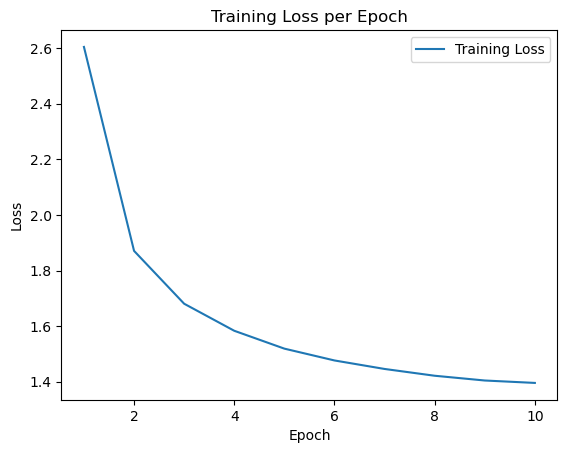

In [139]:
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.show()

## Evaluating the Attention seq2seq model


##### **Q25: How do you evaluate the attention-based seq2seq model on a validation set using metrics such as BLEU score?**


In [140]:
def evaluate_bleu(model, iterator):
    model.eval()
    references = []
    hypotheses = []
    with torch.no_grad():
        for source_batch, target_batch, source_lengths, _ in iterator:
            source_batch = source_batch.to(device)
            target_batch = target_batch.to(device)
            if isinstance(source_lengths, torch.Tensor):
                source_lengths = source_lengths.tolist()
            source_lengths = torch.tensor(source_lengths, dtype=torch.long)

            encoder_outputs, hidden = model.encoder(source_batch, source_lengths)
            hidden = hidden[:model.decoder.rnn.num_layers]
            input_token = torch.tensor([target_vocab['<SOS>']] * source_batch.size(0)).to(device)
            mask = model.create_mask(source_batch)
            batch_hypotheses = [[] for _ in range(source_batch.size(0))]
            max_len = target_batch.size(1)
            for _ in range(max_len):
                output, hidden, _ = model.decoder(input_token, hidden, encoder_outputs, mask)
                top1 = output.argmax(1)
                input_token = top1
                for i in range(source_batch.size(0)):
                    token = top1[i].item()
                    if token != target_vocab['<EOS>'] and token != target_vocab['<PAD>']:
                        batch_hypotheses[i].append(inv_target_vocab.get(token, '<UNK>'))
            for i in range(source_batch.size(0)):
                target_sentence = target_batch[i].cpu().numpy()
                target_tokens = [inv_target_vocab.get(token, '<UNK>') for token in target_sentence if token not in (target_vocab['<SOS>'], target_vocab['<EOS>'], target_vocab['<PAD>'])]
                references.append([target_tokens])
                hypotheses.append(batch_hypotheses[i])
    bleu_score = corpus_bleu(references, hypotheses)
    return bleu_score

##### **Q26: How do you calculate the BLEU score to assess the quality of the translations produced by the model?**


In [141]:
valid_bleu = evaluate_bleu(seq2seq_model, val_loader)
print(f'Validation BLEU Score: {valid_bleu:.4f}')

Validation BLEU Score: 0.3139


##### **Q27: How do you compare the performance of the attention-based seq2seq model with a vanilla seq2seq model without attention?**

In [143]:
class DecoderWithoutAttention(nn.Module):
    def __init__(self, output_dim, embed_dim, hidden_dim, num_layers):
        super(DecoderWithoutAttention, self).__init__()
        self.embedding = nn.Embedding(output_dim, embed_dim, padding_idx=target_vocab['<PAD>'])
        self.rnn = nn.GRU(embed_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_token, hidden):
        input_token = input_token.unsqueeze(1)
        embedded = self.embedding(input_token)
        output, hidden = self.rnn(embedded, hidden)
        prediction = self.fc(output.squeeze(1))
        return prediction, hidden

In [144]:
encoder_wo_attention = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)
decoder_wo_attention = DecoderWithoutAttention(output_dim, embed_dim, hidden_dim, num_layers).to(device)

In [145]:
class Seq2SeqWithoutAttention(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2SeqWithoutAttention, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, source, source_lengths, target, teacher_forcing_ratio=0.5):
        batch_size = source.size(0)
        target_len = target.size(1)
        target_vocab_size = self.decoder.embedding.num_embeddings

        outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(self.device)
        encoder_outputs, hidden = self.encoder(source, source_lengths)

        hidden = hidden[:self.decoder.rnn.num_layers]  # Since the encoder is bidirectional, we need to combine the hidden states
        input_token = target[:, 0]

        for t in range(1, target_len):
            output, hidden = self.decoder(input_token, hidden)
            outputs[:, t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input_token = target[:, t] if teacher_force else top1

        return outputs

In [146]:
seq2seq_model_wo_attention = Seq2SeqWithoutAttention(encoder_wo_attention, decoder_wo_attention, device).to(device)

num_epochs = 10
clip = 1.0
teacher_forcing_ratio = 0.5
train_losses = []

for epoch in range(num_epochs):
    train_loss = train(seq2seq_model_wo_attention, train_loader, optimizer, criterion, clip, teacher_forcing_ratio)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}')

Epoch [1/10], Train Loss: 9.2272
Epoch [2/10], Train Loss: 9.2272
Epoch [3/10], Train Loss: 9.2272
Epoch [4/10], Train Loss: 9.2272
Epoch [5/10], Train Loss: 9.2273
Epoch [6/10], Train Loss: 9.2272
Epoch [7/10], Train Loss: 9.2272
Epoch [8/10], Train Loss: 9.2272
Epoch [9/10], Train Loss: 9.2271
Epoch [10/10], Train Loss: 9.2271


## Visualizing Attention weights


##### **Q28: How do you visualize the attention weights for specific input-output pairs using a heatmap?**


In [155]:
import seaborn as sns
import matplotlib.ticker as ticker

def visualize_attention(source_tokens, translated_tokens, attentions):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    sns.set()
    fig, ax = plt.subplots(figsize=(10, 8))
    attention = attentions[:len(translated_tokens), :len(source_tokens)+2]
    sns.heatmap(attention, 
                xticklabels=['<SOS>'] + source_tokens + ['<EOS>'], 
                yticklabels=translated_tokens, 
                ax=ax)
    ax.set_xlabel('Source Sentence')
    ax.set_ylabel('Translated Sentence')
    plt.xticks(rotation=45)
    plt.show()

In [156]:
def translate_sentence(model, sentence, source_vocab, target_vocab, inv_target_vocab, max_len=50):
    model.eval()
    tokens = tokenize(sentence)
    indexes = [source_vocab['<SOS>']] + [source_vocab.get(word, source_vocab['<UNK>']) for word in tokens] + [source_vocab['<EOS>']]
    src_tensor = torch.tensor(indexes).unsqueeze(0).to(device)
    src_length = torch.tensor([len(indexes)], dtype=torch.long)

    with torch.no_grad():
        encoder_outputs, hidden = model.encoder(src_tensor, src_length)
        hidden = hidden[:model.decoder.rnn.num_layers]
        input_token = torch.tensor([target_vocab['<SOS>']]).to(device)
        mask = model.create_mask(src_tensor)
        attentions = torch.zeros(max_len, len(indexes)).to(device)
        translated_tokens = []
        for t in range(max_len):
            output, hidden, attention_weights = model.decoder(input_token, hidden, encoder_outputs, mask)
            attentions[t] = attention_weights
            top1 = output.argmax(1)
            token = top1.item()
            if token == target_vocab['<EOS>']:
                break
            translated_tokens.append(inv_target_vocab.get(token, '<UNK>'))
            input_token = top1
        attentions = attentions[:t+1]
    return translated_tokens, attentions.cpu().detach().numpy()

In [157]:
example_idx = 0  # Change the index to select different examples
source_tokens = val_data[example_idx][0]
target_tokens = val_data[example_idx][1]

source_sentence = ' '.join(source_tokens)
target_sentence = ' '.join(target_tokens)

print(f"Source Sentence: {source_sentence}")
print(f"Target Sentence: {target_sentence}")

Source Sentence: are you envious?
Target Sentence: êtes-vous jalouse ?


Translated Sentence: es-tu <UNK> ?


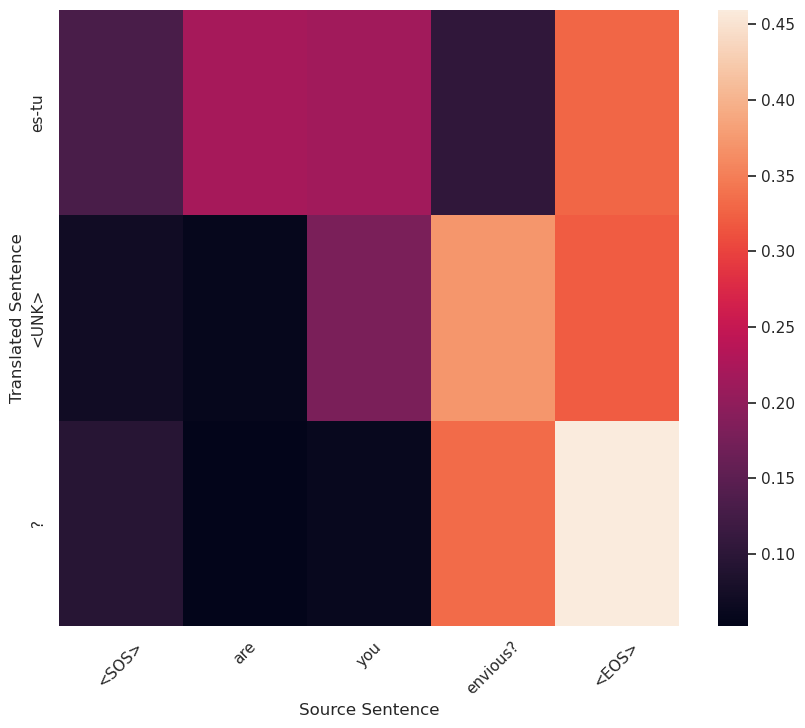

In [158]:
translated_tokens, attentions = translate_sentence(seq2seq_model, source_sentence, source_vocab, target_vocab, inv_target_vocab)  # Translate the sentence and get attention weights

print(f"Translated Sentence: {' '.join(translated_tokens)}")

visualize_attention(source_tokens, translated_tokens, attentions)  # Visualize attention

##### **Q29: How do you interpret the attention heatmap to understand which parts of the input sequence the model focused on during translation?**


In [ ]:
# High attention weights (darker colors) indicate that the model focused on those input tokens when generating a particular output token.

##### **Q30: How do you extract the attention weights from the Decoder to analyze how the model's attention changes across decoding steps?**

In [161]:
example_idx = 0  # Adjust as needed
source_tokens = val_data[example_idx][0]
target_tokens = val_data[example_idx][1]

source_sentence = ' '.join(source_tokens)
target_sentence = ' '.join(target_tokens)

print(f"Source Sentence: {source_sentence}")
print(f"Target Sentence: {target_sentence}")

Source Sentence: are you envious?
Target Sentence: êtes-vous jalouse ?


Translated Sentence: es-tu <UNK> ?


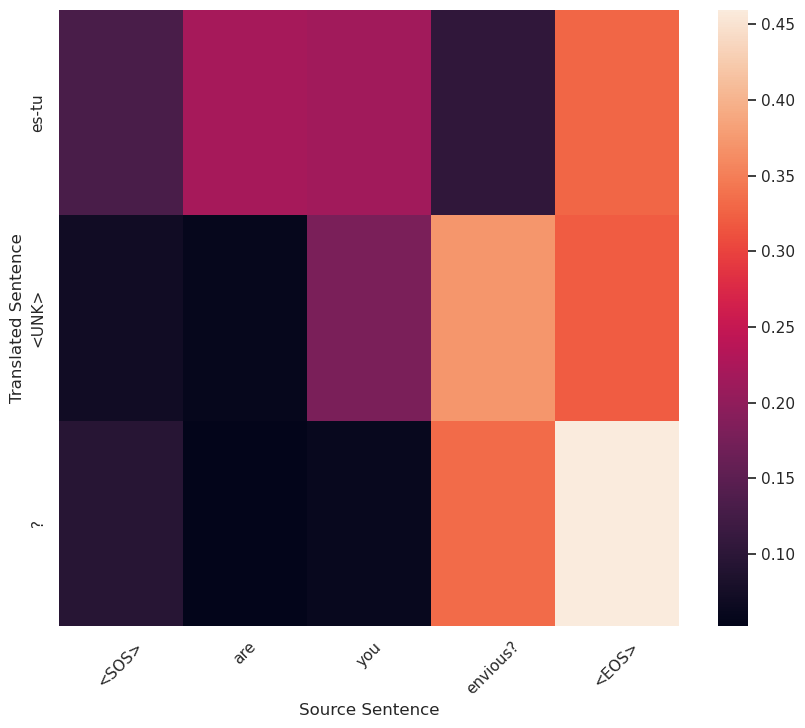

In [162]:
translated_tokens, attentions = translate_sentence(seq2seq_model, source_sentence, source_vocab, target_vocab, inv_target_vocab)

print(f"Translated Sentence: {' '.join(translated_tokens)}")

visualize_attention(source_tokens, translated_tokens, attentions)

In [163]:
source_tokens_with_special = ['<SOS>'] + source_tokens + ['<EOS>']

print(f"Length of source_tokens_with_special: {len(source_tokens_with_special)}")
print(f"Shape of attentions: {attentions.shape}")

Length of source_tokens_with_special: 5
Shape of attentions: (4, 5)


In [165]:
for t_idx, t_word in enumerate(translated_tokens):
    attn_weights = attentions[t_idx]
    max_src_idx = np.argmax(attn_weights)
    src_word = source_tokens_with_special[max_src_idx]
    print(f"At target word '{t_word}', model attended most to source word '{src_word}' with weight {attn_weights[max_src_idx]:.4f}")

At target word 'es-tu', model attended most to source word '<EOS>' with weight 0.3278
At target word '<UNK>', model attended most to source word 'envious?' with weight 0.3718
At target word '?', model attended most to source word '<EOS>' with weight 0.4594


## Experimenting with hyperparameters


##### **Q31: How do you adjust the learning rate and observe its effect on the stability and performance of the attention-based seq2seq model?**


In [179]:
learning_rates = [0.01, 0.001, 0.0001]
num_epochs = 5  # Adjusted for quicker experimentation
learning_rate_losses = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    encoder = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)
    attention = Attention(hidden_dim).to(device)
    decoder = Decoder(output_dim, embed_dim, hidden_dim, num_layers, attention).to(device)
    seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)  # Re-instantiate models to reset parameters

    optimizer = optim.Adam(seq2seq_model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(ignore_index=target_vocab['<PAD>'])
    train_losses = []

    for epoch in range(num_epochs):
        train_loss = train(seq2seq_model, train_loader, optimizer, criterion, clip, teacher_forcing_ratio)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    learning_rate_losses[lr] = train_losses


Training with learning rate: 0.01


OutOfMemoryError: CUDA out of memory. Tried to allocate 30.00 MiB. GPU 0 has a total capacity of 3.80 GiB of which 37.81 MiB is free. Including non-PyTorch memory, this process has 3.52 GiB memory in use. Of the allocated memory 3.37 GiB is allocated by PyTorch, and 52.76 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(1, num_epochs+1), learning_rate_losses[lr], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Different Learning Rates')
plt.legend()
plt.show()

##### **Q32: How do you experiment with different hidden dimensions and evaluate how they impact the performance of the model?**


In [ ]:
hidden_dims = [32, 64, 128]
num_epochs = 5
hidden_dim_losses = {}

for hd in hidden_dims:
    print(f"\nTraining with hidden dimension: {hd}")
    encoder = Encoder(input_dim, embed_dim, hd, num_layers).to(device)
    attention = Attention(hd).to(device)
    decoder = Decoder(output_dim, embed_dim, hd, num_layers, attention).to(device)
    seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)

    optimizer = optim.Adam(seq2seq_model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss(ignore_index=target_vocab['<PAD>'])
    train_losses = []

    for epoch in range(num_epochs):
        train_loss = train(seq2seq_model, train_loader, optimizer, criterion, clip, teacher_forcing_ratio)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    hidden_dim_losses[hd] = train_losses

In [ ]:
plt.figure(figsize=(10, 6))
for hd in hidden_dims:
    plt.plot(range(1, num_epochs+1), hidden_dim_losses[hd], label=f'Hidden Dim={hd}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Different Hidden Dimensions')
plt.legend()
plt.show()

##### **Q33: How do you tune the teacher forcing ratio during training and analyze how it affects the model’s convergence?**


In [ ]:
teacher_forcing_ratios = [0.9, 0.3, 0.1]
num_epochs = 5
tfr_losses = {}

for ratio in teacher_forcing_ratios:
    print(f"\nTraining with teacher forcing ratio: {ratio}")
    encoder = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)
    attention = Attention(hidden_dim).to(device)
    decoder = Decoder(output_dim, embed_dim, hidden_dim, num_layers, attention).to(device)
    seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)

    optimizer = optim.Adam(seq2seq_model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss(ignore_index=target_vocab['<PAD>'])
    train_losses = []

    for epoch in range(num_epochs):
        train_loss = train(seq2seq_model, train_loader, optimizer, criterion, clip, ratio)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    tfr_losses[ratio] = train_losses

In [ ]:
plt.figure(figsize=(10, 6))
for ratio in teacher_forcing_ratios:
    plt.plot(range(1, num_epochs+1), tfr_losses[ratio], label=f'TFR={ratio}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Different Teacher Forcing Ratios')
plt.legend()
plt.show()

##### **Q34: How do you experiment with different attention scoring functions (e.g., dot product vs. additive) and observe their impact on model performance?**

In [ ]:
class DotProductAttention(nn.Module):
    def __init__(self):
        super(DotProductAttention, self).__init__()

    def forward(self, hidden, encoder_outputs, mask):
        # hidden: [batch_size, hidden_dim]
        # Adjust hidden and encoder_outputs dimensions if necessary
        hidden = hidden.unsqueeze(2)
        attention = torch.bmm(encoder_outputs, hidden).squeeze(2)
        attention = attention.masked_fill(mask == 0, -1e10)
        return torch.softmax(attention, dim=1)

In [ ]:
attention_mechanisms = {
    'AdditiveAttention': Attention(hidden_dim).to(device),
    'DotProductAttention': DotProductAttention().to(device)
}

num_epochs = 5
attention_losses = {}

for name, attn in attention_mechanisms.items():
    print(f"\nTraining with attention mechanism: {name}")
    encoder = Encoder(input_dim, embed_dim, hidden_dim, num_layers).to(device)
    decoder = Decoder(output_dim, embed_dim, hidden_dim, num_layers, attn).to(device)
    seq2seq_model = Seq2Seq(encoder, decoder, device).to(device)

    optimizer = optim.Adam(seq2seq_model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss(ignore_index=target_vocab['<PAD>'])
    train_losses = []

    for epoch in range(num_epochs):
        train_loss = train(seq2seq_model, train_loader, optimizer, criterion, clip, teacher_forcing_ratio)
        train_losses.append(train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

    attention_losses[name] = train_losses

In [ ]:
plt.figure(figsize=(10, 6))
for name in attention_mechanisms.keys():
    plt.plot(range(1, num_epochs+1), attention_losses[name], label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch for Different Attention Mechanisms')
plt.legend()
plt.show()

In [1]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' does not exist.
